In [6]:
# implement https://arxiv.org/pdf/1705.08690.pdf on avalanche framework on permuted MNIST
# https://aahaanmaini.medium.com/mimicking-human-continual-learning-in-a-neural-network-c15e1ae11d70
#continual learning

## create GAN

In [28]:
%load_ext autoreload
%autoreload 2
from helper_func import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
#https://github.com/znxlwm/pytorch-MNIST-CelebA-GAN-DCGAN/blob/master/pytorch_MNIST_GAN.py
import matplotlib.pyplot as plt
from torch import nn
#import imageio
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# G(z)
class generator(nn.Module):
    # initializers
    def __init__(self, input_size=32, n_class = 10):
        super(generator, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(self.fc1.out_features, 512)
        self.fc3 = nn.Linear(self.fc2.out_features, 1024)
        self.fc4 = nn.Linear(self.fc3.out_features, n_class)

    # forward method
    def forward(self, input):
        x = F.leaky_relu(self.fc1(input), 0.2)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = F.tanh(self.fc4(x))

        return x

class discriminator(nn.Module):
    # initializers
    def __init__(self, input_size=32, n_class=10):
        super(discriminator, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(self.fc1.out_features, 512)
        self.fc3 = nn.Linear(self.fc2.out_features, 256)
        self.fc4 = nn.Linear(self.fc3.out_features, n_class)

    # forward method
    def forward(self, input):
        x = F.leaky_relu(self.fc1(input), 0.2)
        x = F.dropout(x, 0.3)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = F.dropout(x, 0.3)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = F.dropout(x, 0.3)
        x = F.sigmoid(self.fc4(x))

        return x

fixed_z_ = torch.randn((5 * 5, 100))    # fixed noise
fixed_z_ = Variable(fixed_z_, volatile=True)

# training parameters
batch_size = 128
lr = 0.0002

# data_loader
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])
# network
G = generator(input_size=100, n_class=28*28)
D = discriminator(input_size=28*28, n_class=1)

# Binary Cross Entropy loss
BCE_loss = nn.BCELoss()

# Adam optimizer
G_optimizer = optim.Adam(G.parameters(), lr=lr)
D_optimizer = optim.Adam(D.parameters(), lr=lr)


c:\Users\mathi\Anaconda3\envs\DL2\lib\site-packages\ipykernel_launcher.py:53: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


## Neural Network Architecture

In [30]:
from torch import nn
import torch
import torch.nn.functional as F
from torch.optim import SGD
from torch.nn import CrossEntropyLoss

#MNIST neural network with 2 hidden layers of 400 neurons each
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 400)
        self.fc2 = nn.Linear(400, 400)
        self.fc3 = nn.Linear(400, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model_naive = Net()
model_cl = Net()

optimizer = SGD(model_naive.parameters(), lr=0.01, momentum=0.9)
criterion = CrossEntropyLoss()


## naive

In [47]:
%reload_ext autoreload
%autoreload 2

MLP_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,), std=(0.5,))
])

from helper_func import get_data_loaders
#train naive
nave_accuracies = []
for experience in range(5):
    train_loader, test_loader = get_data_loaders(experience, batch_size=batch_size, transform = MLP_transform)
    for epoch in range(5):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = Variable(data), Variable(target)
            optimizer.zero_grad()
            output = model_naive(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            if batch_idx % 100 == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.item()))
    accuracy = test_model(model_naive, experience, test_loader)
    nave_accuracies.append(accuracy)

Train Epoch: 0 [0/12665 (0%)]	Loss: 12.192914
Train Epoch: 1 [0/12665 (0%)]	Loss: 0.000472
Train Epoch: 2 [0/12665 (0%)]	Loss: 0.002475
Train Epoch: 3 [0/12665 (0%)]	Loss: 0.000285
Train Epoch: 4 [0/12665 (0%)]	Loss: 0.002615
Test Accuracy of the model on the 0 test images: 99.858154296875 %
Train Epoch: 0 [0/11791 (0%)]	Loss: 18.705183
Train Epoch: 1 [0/11791 (0%)]	Loss: 0.078781
Train Epoch: 2 [0/11791 (0%)]	Loss: 0.111158
Train Epoch: 3 [0/11791 (0%)]	Loss: 0.059354
Train Epoch: 4 [0/11791 (0%)]	Loss: 0.153185
Test Accuracy of the model on the 1 test images: 47.3453483581543 %
Train Epoch: 0 [0/11339 (0%)]	Loss: 12.494276
Train Epoch: 1 [0/11339 (0%)]	Loss: 0.117916
Train Epoch: 2 [0/11339 (0%)]	Loss: 0.039820
Train Epoch: 3 [0/11339 (0%)]	Loss: 0.017011
Train Epoch: 4 [0/11339 (0%)]	Loss: 0.080391
Test Accuracy of the model on the 2 test images: 30.439891815185547 %
Train Epoch: 0 [0/11809 (0%)]	Loss: 13.731761
Train Epoch: 1 [0/11809 (0%)]	Loss: 0.082380
Train Epoch: 2 [0/11809 (0

In [86]:
for x,y in new_dataset:
    print(x.shape)
    print(y.shape)
    break

torch.Size([1, 28, 28])


AttributeError: 'int' object has no attribute 'shape'

### scholar with GAN

In [90]:
%reload_ext autoreload
%autoreload 2
from helper_func import *
from torch.utils.data import ConcatDataset
# data_loader
GAN_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

#train CL
cl_accuracies = []
for experience in range(5):
    train_loader, test_loader = get_data_loaders(experience, batch_size=batch_size, transform = MLP_transform)

    if experience != 0:
        #create new data with GAN
        # add transform
        new_dataset = generate_data(G, D, n_images = 60000*2/10)
        #concatenate with old data
        new_dataset = ConcatDataset([train_loader.dataset, new_dataset])
        
        train_loader = torch.utils.data.DataLoader(new_dataset, batch_size=batch_size, shuffle=True)

    G, D, D_losses, G_losses = train_GAN(G, D, train_loader, G_optimizer, D_optimizer, train_epoch = 1)
    for epoch in range(0):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = Variable(data), Variable(target)
            optimizer.zero_grad()
            output = model_naive(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            if batch_idx % 100 == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.item()))
    accuracy = test_model(model_naive, experience, test_loader)
    cl_accuracies.append(accuracy)


[1/1]:GAN loss_d: 0.570, loss_g: 2.806
Test Accuracy of the model on the 0 test images: 99.90543365478516 %
Fake images shape: torch.Size([11904, 1, 28, 28])


AttributeError: 'TensorDataset' object has no attribute 'size'

## plots

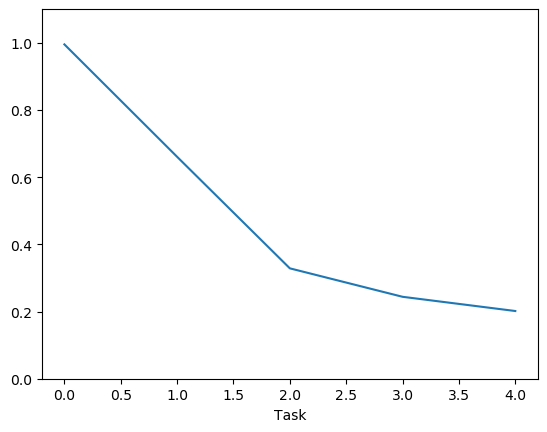

In [70]:
#TODO: use naive and scholar evaluation to plot results

plt.plot(nave_accuracies, label='naive')
plt.plot(cl_accuracies, label='CL')

plt.xlabel('Task')

plt.ylim(0, 1.1)
plt.show()